# Comparison of topic models for different number of topics

To evaluate the influence of the number of topics on the topic model results, the same corpus has been trained several times using gensims LDA model. The parameters for the training runs are
* document length varies, average is 250 tokens
* automatic re-evaluation of alpha and eta values
* 2000 iterations with 5 passes over the corpus
* Tokenization using mmseg with a dictionary of frequently used terms of Classical Chinese (ca 3600 entries of 2 or more characters) and the character frequencies of the Kanseki Repository

## The following labels have been used:

* The number of topics is also the label of the models.

## Evaluation points

1. Topic term table
2. Distribution of alpha values
3. Cooccurrence of tokens in the top 20 topic terms
4. Topics for term
5. Document by similarity


In [1]:
from IPython.core.display import display, HTML
import ktm_analysis as ktm
import numpy as np
import matplotlib.pyplot as plt
target="topic_number"
models = ktm.prepan(target)
display(HTML("<h1>1. Topic term table</h1>"))
display(HTML("<p>Topic terms of all models, arranged by descending alpha value</p>"))
display(HTML(ktm.topic_terms_table(models, html=True)))

15,0.0877,今 陛下 必 天 能 欲 相 知 心 國,3,0.0473,同 侍 平 郎 章 書 部 尚 門 加,1,0.0422,郎 侍 書 同 部 平 尚 戸 門 吏,27,0.0340,郎 侍 同 書 平 部 門 尚 戸 罷,48,0.0239,平 同 章 侍 郎 部 書 戸 門 罷
11,0.0711,書 士 官 相 郎 侍 門 部 學 司,30,0.0471,城 攻 賊 守 衆 戰 引 圍 撃 救,21,0.0383,城 賊 守 攻 戰 衆 圍 士 出 引,24,0.0296,城 出 士 圍 衆 夜 入 引 攻 騎,99,0.0225,正 春 車 駕 東都 甲子 戊寅 冬 戊申 壬申
10,0.0707,同 平 章 侍 郎 部 書 兼 加 尚,11,0.0465,陛下 知 相 今 天 必 欲 用 能 君,53,0.0351,今 必 天 行 相 已 欲 時 能 用,19,0.0264,請 廬州 澤州 仕 致 承嗣 滉 元忠 瑄 書,51,0.0220,戰 城 出 衆 賊 騎 引 撃 走 士
0,0.0691,刺 州 克用 鎭 討 河東 攻 詔 留 守,10,0.0426,討 行 營 招 道 詔 都 總 京兆 統,59,0.0337,相 用 多 賦 道 奏 財 宰 先 士,25,0.0256,留 後 鎭 河中 知 泚 昭義 鳳翔 魏博 詔,83,0.0213,司 兼 行 馬 乙亥 甲寅 府 乙丑 令 空
13,0.0677,城 賊 衆 餘 出 騎 數 入 斬 戰,19,0.0424,后 見 相 宮 疾 日 召 入 母 公,52,0.0335,兼 薨 僕 書 罷 射 校 令 檢 侍,69,0.0251,正 春 改 赦 天 丙申 辛巳 刺 己丑 朔,50,0.0208,薨 校 檢 己丑 丁酉 丙午 騎 壬戌 常侍 山南東道
12,0.0671,數 錢 士 餘 民 給 家 府 財 官,23,0.0414,刺 留 後 貶 知 廷 魏博 朝 押 殺,57,0.0323,正 春 淮南 天 赦 改 神 號 廣陵 山南東道,62,0.0236,章 平 宦官 充 加 同 制 籍 丁 田,31,0.0206,都 討 招 督 副 馬 留 知 徐州 行
3,0.0659,駢 都 寇 神 用之 突 戍 帥 置 邊,25,0.0412,薨 僕 射 后 南詔 少 司 書 立 皇,5,0.0300,刺 攻 敗 破 殺 江 陷 撃 斬 幽州,39,0.0235,蕃 吐 廣陵 盧龍 寇 輸 奏 隴右 承宗 船,73,0.0202,年 官 數 歳 給 賦 用 時 食 多
5,0.0631,相 死 罪 奏 知 察 怒 殺 等 復,39,0.0411,賊 出 入 士 衆 城 餘 日 夜 數,55,0.0297,知 卿 能 陛下 理 朕 相 諫 善 問,5,0.0234,賊 衆 陷 戰 守 拒 攻 死 殺 帥,71,0.0199,攻 救 刺 陷 賊 據 衆 黄巣 帥 奔
2,0.0630,正 春 後 留 薨 南詔 幸 温 冬 全忠,14,0.0410,相 公 宰 功 朝 朕 卿 宦官 心 復,18,0.0286,車 駕 幸 茂貞 鳳翔 李茂貞 東都 忠武 全忠 八,41,0.0224,州 縣 鎭 民 給 餘 年 賦 令 官,86,0.0196,赦 改 天 忠武 甲申 丙寅 戊辰 監 壬辰 戊子
19,0.0622,攻 撃 戰 全忠 敗 衆 破 行密 賊 救,21,0.0400,正 春 駕 車 赦 天 幸 宮 改 東都,0,0.0278,撃 全忠 攻 朱全忠 克用 破 戰 救 騎 引,56,0.0220,司 加 兼 河東 客 同 夏 賓 壬寅 平,35,0.0186,泚 丙申 刺 潤州 等 庚寅 滉 長 渥 瑄
4,0.0587,吐 蕃 刺 日 朔 思明 食 祿山 大梁 請,27,0.0380,士 令 奏 時 財 道 府 縣 從 行,15,0.0275,朝 廷 今 且 請 欲 國 必 許 公,75,0.0214,陛下 朕 卿 諫 日 今 欲 知 相 天,37,0.0183,州 鎭 汴 鹽 刺 等 領 鄆 淮西 詔


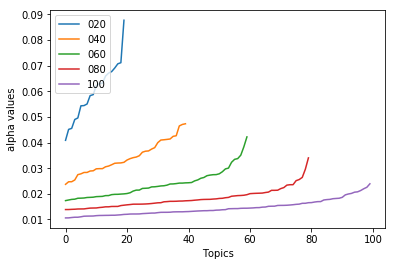

In [2]:
display(HTML("<h1>2. Distribution of alpha values</h1>"))
for m in models:
    lda=m[0]
    alpha=np.sort(lda.alpha)
    plt.plot(alpha)
plt.ylabel('alpha values')
plt.xlabel('Topics')
plt.legend([m[5] for m in models], loc='upper left')
plt.show()

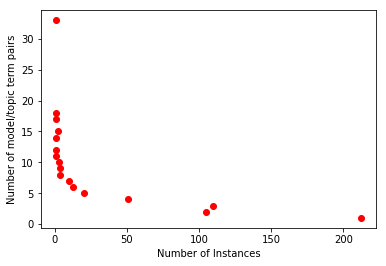

In [3]:
num_words = 20
display(HTML("<h1>3. Cooccurrence of tokens in the top %d topic terms</h1>" % (num_words)))
co=ktm.tab_co_list(ktm.get_tt_co(models, num_words=num_words))
plt.plot(co[1], co[0], 'ro')
plt.ylabel('Number of model/topic term pairs')
plt.xlabel('Number of Instances')
plt.show()

In [4]:
term= u"平"
display(HTML("<h1>4. Topics for term %s</h1>" % (term)))
ktm.topics_for_term(models, term)

[('020', [(10, 0.049208889740062108)]),
 ('040', [(3, 0.065682667084235591)]),
 ('060',
  [(1, 0.071230473176295786),
   (26, 0.010966244150613296),
   (38, 0.010611322115249551),
   (52, 0.014814451792709484)]),
 ('080',
  [(27, 0.062480607292764202),
   (56, 0.020430989773207467),
   (62, 0.073414869602508592)]),
 ('100', [(48, 0.10355462689002637)])]

In [5]:
res=ktm.get_simdocs(models, 3)
display(HTML("<h1>5. Document by similarity</h1>"))
display(HTML("<p>%s</p>" % ("<p>\n".join(ktm.print_simdocs(res, html=True)))))